In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
from tqdm import tqdm
import pandas as pd

# Label EDA

In [2]:
mtat = pd.read_csv('../data/mtat_label.csv', index_col=0)
gtzan = pd.read_csv('../data/gtzan_label.csv', index_col=0)

### mtat

In [3]:
mtat.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
1,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,1,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
2,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
3,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
4,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...


In [9]:
mtat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25863 entries, 0 to 25862
Columns: 135 entries, singer to filepath
dtypes: bool(29), int64(105), object(1)
memory usage: 21.8+ MB


Checking the distribution of the number of labels per row

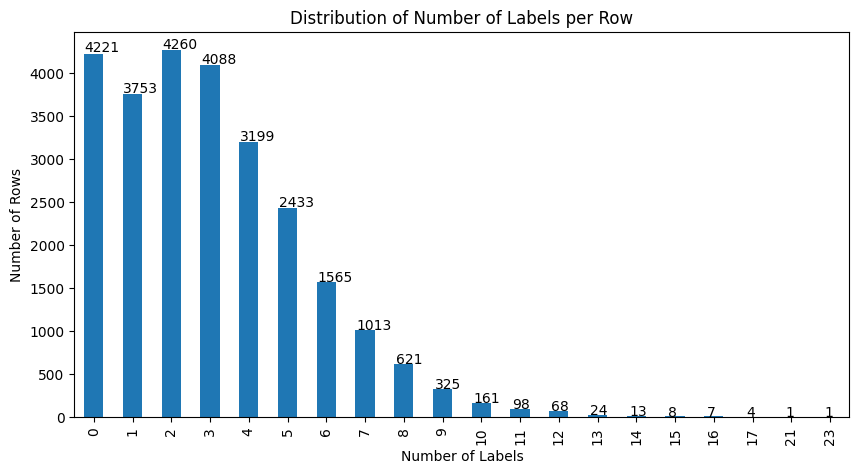

In [10]:
# Count the number of labels per row
label_counts_per_row = mtat.iloc[:,:-1].sum(axis=1)

# Count the frequency of rows with 'n' labels
rows_with_n_labels = label_counts_per_row.value_counts().sort_index()

# Plotting the distribution of 'n' labels
plt.figure(figsize=(10, 5))
bars = rows_with_n_labels.plot(kind='bar')
plt.title('Distribution of Number of Labels per Row')
plt.xlabel('Number of Labels')
plt.ylabel('Number of Rows')

# Add text annotations
for p in bars.patches:
    bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [11]:
# Calculate the sum of labels for each row
row_label_sum = mtat.iloc[:, :-1].sum(axis=1) 

# Filter rows where the sum of labels is zero
rows_with_no_labels = mtat[row_label_sum == 0]
rows_with_no_labels


,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
6,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/c/lvx_nova-lvx_nova-01-contimune-175-204.mp3
9,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/0/american_bach_soloists-j_s__bach__canta...
13,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/the_headroom_project-jetuton_andawai-01...
25,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/9/american_bach_soloists-heinrich_schutz_...
26,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/9/american_bach_soloists-heinrich_schutz_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25812,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/9/american_baroque-dances_and_suites_of_r...
25823,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/8/jacob_heringman-blame_not_my_lute-34-th...
25832,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/3/musica_franca-boismortier__sonatas_for_...
25833,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/3/musica_franca-boismortier__sonatas_for_...


In [12]:
# delete 4421 rows with 0 label
mtat = mtat[row_label_sum != 0]

In [13]:
mtat.shape

(21642, 135)

Checking the distribution of label

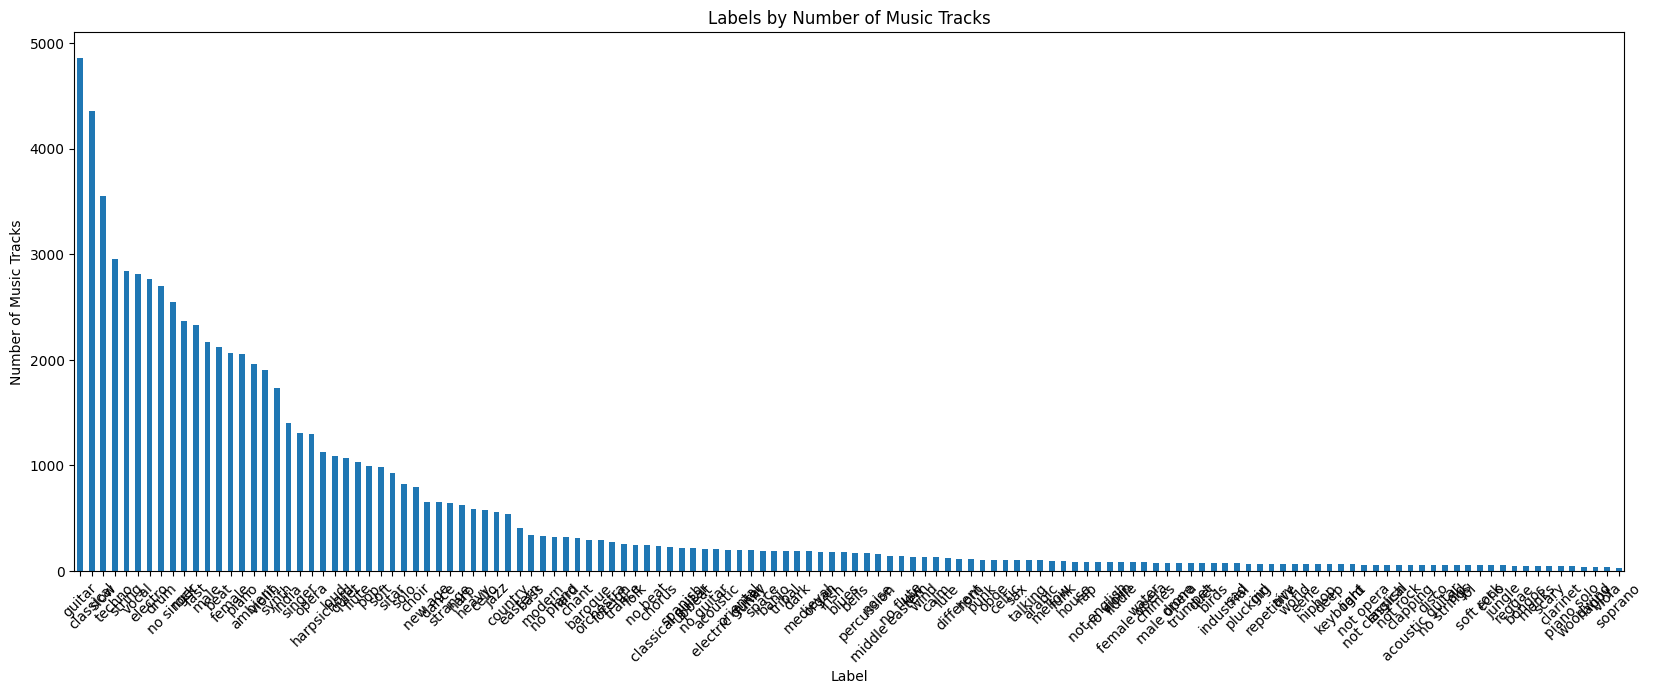

In [14]:
# Count the number of rows with each label
label_counts = mtat.iloc[:,:-1].sum(axis=0)
# Plot only the top 20 most common labels
# top_label_counts = label_counts.nlargest(50)

plt.figure(figsize=(20, 7))  # Adjust figure size as needed
bars = label_counts.sort_values(ascending=False).plot(kind='bar')  

plt.title('Labels by Number of Music Tracks')
plt.xticks(rotation=45)  # A slight rotation can sometimes help with readability
plt.ylabel('Number of Music Tracks')
plt.xlabel('Label')

plt.show()


In [ ]:

# Calculate cumulative percentage of the total labels
label_counts_sorted = label_counts.sort_values(ascending=False)
cumulative_percentage = label_counts_sorted.cumsum() / label_counts_sorted.sum() * 100

# Find the last index where cumulative percentage is less than or equal to 80
last_index = cumulative_percentage[cumulative_percentage <= 95].last_valid_index()

# Slice the cumulative_percentage to include only up to the last index where cumulative percentage is less than or equal to 80
cumulative_percentage_limited = cumulative_percentage.loc[:last_index]

plt.figure(figsize=(20, 7))  # Adjust figure size as needed
cumulative_percentage_limited.plot(kind='bar')

plt.title('Cumulative Percentage of Labels')
plt.xticks(rotation=90)  # Rotate the labels for better visibility
plt.ylabel('Cumulative Percentage')
plt.xlabel('Label')

# Add the cumulative percentage text above every 5 bars
for i, value in enumerate(cumulative_percentage_limited):
    if i % 5 == 0:  # Only label every 5th bar
        plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', rotation=45)


# Show the plot
plt.show()

In [ ]:
# Check how many label it takes to reach 80% of the total count
for i in [80,85,90,95,98,99]:
    print(f'{i}% : {cumulative_percentage[cumulative_percentage<i].count()} labels')

In [ ]:
# Find the last index where cumulative percentage is less than or equal to 95
last_index = cumulative_percentage[cumulative_percentage <= 95].last_valid_index()
# Slice the cumulative_percentage to include only up to the last index where cumulative percentage is less than or equal to 90
cumulative_percentage_limited = cumulative_percentage.loc[:last_index]

# First, we find the labels that make up to 80% of the cumulative percentage.
mtat_95 = cumulative_percentage_limited.index.tolist()
mtat_5 = cumulative_percentage.loc[last_index:].index.tolist()
# Display the list of labels outside of the top 90%

print(f'labels_outside_90%', mtat_5)
print()
print(f'labels_upto_90%', mtat_95)


In [ ]:
mtat_filtered = mtat.loc[mtat[mtat_95].sum(axis=1) >= 1, mtat_95 + ['filepath']]
mtat_filtered.info()  # Display the info of the filtered dataframe to verify

### Gtzan

In [5]:
gtzan.head()

,filepath,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,gtzan/genres_original/blues/blues.00000.wav,True,False,False,False,False,False,False,False,False,False
1,gtzan/genres_original/blues/blues.00001.wav,True,False,False,False,False,False,False,False,False,False
2,gtzan/genres_original/blues/blues.00002.wav,True,False,False,False,False,False,False,False,False,False
3,gtzan/genres_original/blues/blues.00003.wav,True,False,False,False,False,False,False,False,False,False
4,gtzan/genres_original/blues/blues.00004.wav,True,False,False,False,False,False,False,False,False,False


In [6]:
gtzan = gtzan.loc[:, (gtzan != 0).any(axis=0)]

In [7]:
gtzan.head()

,filepath,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,gtzan/genres_original/blues/blues.00000.wav,True,False,False,False,False,False,False,False,False,False
1,gtzan/genres_original/blues/blues.00001.wav,True,False,False,False,False,False,False,False,False,False
2,gtzan/genres_original/blues/blues.00002.wav,True,False,False,False,False,False,False,False,False,False
3,gtzan/genres_original/blues/blues.00003.wav,True,False,False,False,False,False,False,False,False,False
4,gtzan/genres_original/blues/blues.00004.wav,True,False,False,False,False,False,False,False,False,False


In [8]:
# check class imbalance
gtzan.sum(axis=0)

filepath     gtzan/genres_original/blues/blues.00000.wavgtz...
blues                                                      100
classical                                                  100
country                                                    100
disco                                                      100
hiphop                                                     100
jazz                                                       100
metal                                                      100
pop                                                        100
reggae                                                     100
rock                                                       100
dtype: object

# Train - Test Split

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and a (test + validation)
train_df, temp_test_df = train_test_split(mtat, test_size=0.4, random_state=42) # 60% for training, 40% for temp_test

# Splitting into validation and test sets
val_df, test_df = train_test_split(temp_test_df, test_size=0.5, random_state=42) # Splitting the 40% into two equal parts for val and test

# Now you have train (60%), validation (20%), and test (20%) sets
print(len(train_df), 'training examples')
print(len(val_df), 'validation examples')
print(len(test_df), 'test examples')


12985 training examples
4328 validation examples
4329 test examples


In [16]:
train_df.to_csv('../data/train_label.csv')
val_df.to_csv('../data/val_label.csv')
test_df.to_csv('../data/test_label.csv')